<a href="https://colab.research.google.com/github/Shrikanthcodes/baseball-analysis/blob/main/Baseball_Pitch_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Import libraries needed for data analysis and plotting
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns



In [34]:
#Google colab file upload
uploaded = files.upload()

Saving AnalyticsQuestionnairePitchData.csv to AnalyticsQuestionnairePitchData (1).csv


In [35]:
# Read CSV file into a DataFrame
df = pd.read_csv('AnalyticsQuestionnairePitchData.csv')

In [37]:
#Let's view the data once
df.head()

,PitchId,GamePk,PitcherHand,PitchCall,PitchType,BatterId,PitcherId,BatterSide,Inning,IsTop,...,TrajectoryPolynomialZ2,TrajectoryX0,TrajectoryX1,TrajectoryX2,TrajectoryV0,TrajectoryV1,TrajectoryV2,TrajectoryA0,TrajectoryA1,TrajectoryA2
0,231,1,L,called_strike,CH,19,11,R,1,1,...,-14.281734,1.629367,50.002632,5.681500,-5.673969,-120.768692,-3.060989,8.499877,21.381056,-28.563467
1,384,1,L,ball,CU,19,11,R,1,1,...,-19.321169,1.694219,50.001293,5.523830,-6.150516,-115.130562,-1.678751,-2.671943,17.934855,-38.642338
2,616,1,L,field_out,SL,19,11,R,1,1,...,-13.228232,1.853305,50.000290,5.531102,-5.501207,-127.250221,-1.467974,0.618823,21.358961,-26.456465
3,503,1,L,ball,SI,24,11,L,1,1,...,-12.885942,1.891533,50.001602,5.475145,-4.826164,-133.365570,-2.412576,14.973106,24.863359,-25.771883
4,322,1,L,swinging_strike,CU,24,11,L,1,1,...,-18.384531,1.784340,50.002003,5.493305,-5.491218,-116.880058,-2.260371,0.099588,18.352825,-36.769062


## **Now let's visualize a few things from our data:**

Pitch Call distribution by Pitch Type

In [8]:
# Group by Pitch Type and Pitch Call, count the number of occurrences
pitch_counts = df.groupby(["PitchType", "PitchCall"])["PitchId"].count().unstack()

In [17]:
# Normalize by row (to get %)
pitch_perc = pitch_counts.div(pitch_counts.sum(axis=1), axis=0)
plt.rcParams["figure.figsize"] = [10.50, 10.50]
plt.rcParams["figure.autolayout"] = True

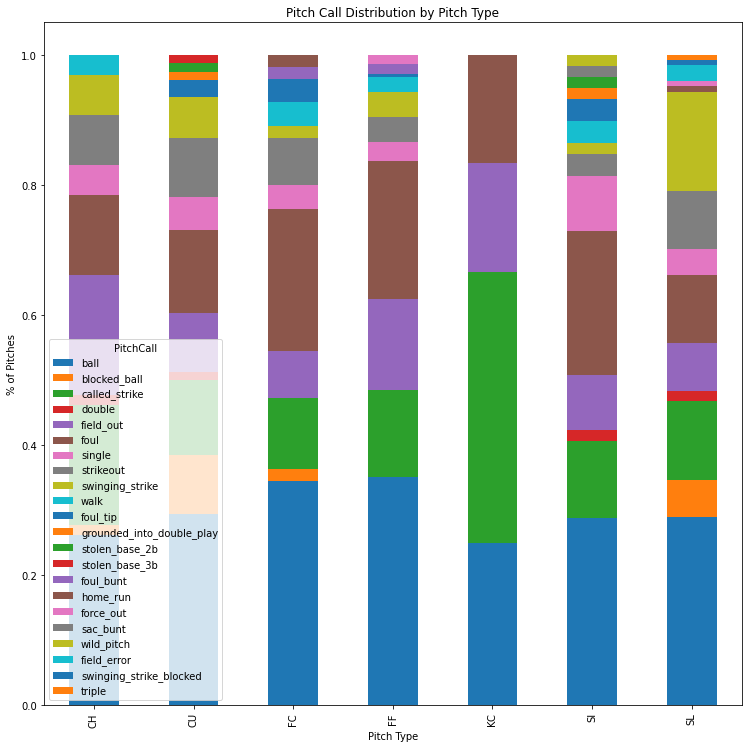

In [18]:
# Plot as stacked bar chart
pitch_perc.plot(kind="bar", stacked=True)
plt.title("Pitch Call Distribution by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("% of Pitches")
plt.show()


Average Strike Zone plot by Pitch Type

In [20]:
# Group by Pitch Type and calculate average Strike Zone Top and Bottom
strike_zone = df.groupby("PitchType")[["StrikeZoneTop", "StrikeZoneBottom"]].mean()



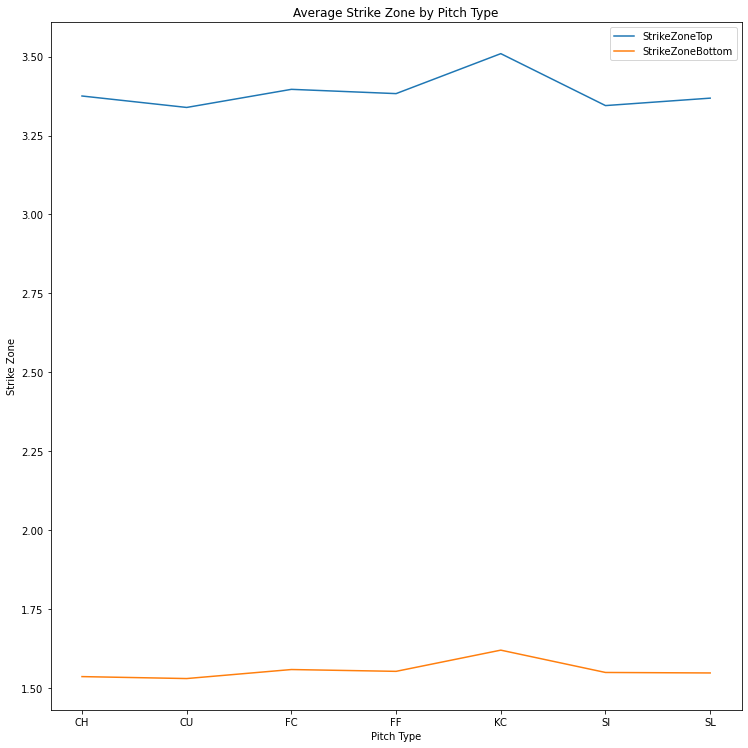

In [21]:
# Plot as line chart
strike_zone.plot(kind="line")
plt.title("Average Strike Zone by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Strike Zone")
plt.legend(loc="best")
plt.show()

Pitch Speed distribution by Pitch Type and Batter Side

In [22]:
# Filter for Fastball pitches only
fastballs = df[df["PitchType"] == "FF"]


In [23]:
# Group by Pitch Type, Batter Side, and Release Speed, count the number of occurrences
speed_counts = fastballs.groupby(["PitchType", "BatterSide", "ReleaseSpeed"])["PitchId"].count().reset_index(name="Count")



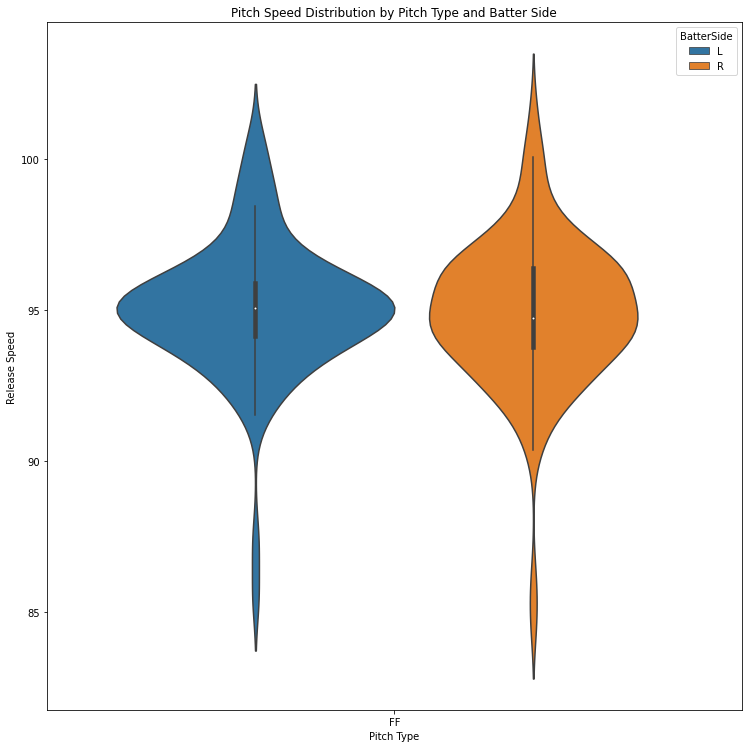

In [26]:
# Plot as Violinplot
sns.violinplot(x="PitchType", y="ReleaseSpeed", hue="BatterSide", data=speed_counts)
plt.title("Pitch Speed Distribution by Pitch Type and Batter Side")
plt.xlabel("Pitch Type")
plt.ylabel("Release Speed")
plt.show()

Pitch Count distribution by Inning

In [27]:
# Group by Inning and Pitch Number, count the number of occurrences
pitch_counts = df.groupby(["Inning", "PitchNumber"])["PitchId"].count().reset_index(name="Count")


In [28]:
# Pivot the data to have Inning as rows and Pitch Number as columns
pitch_counts_pivot = pitch_counts.pivot(index="Inning", columns="PitchNumber", values="Count")


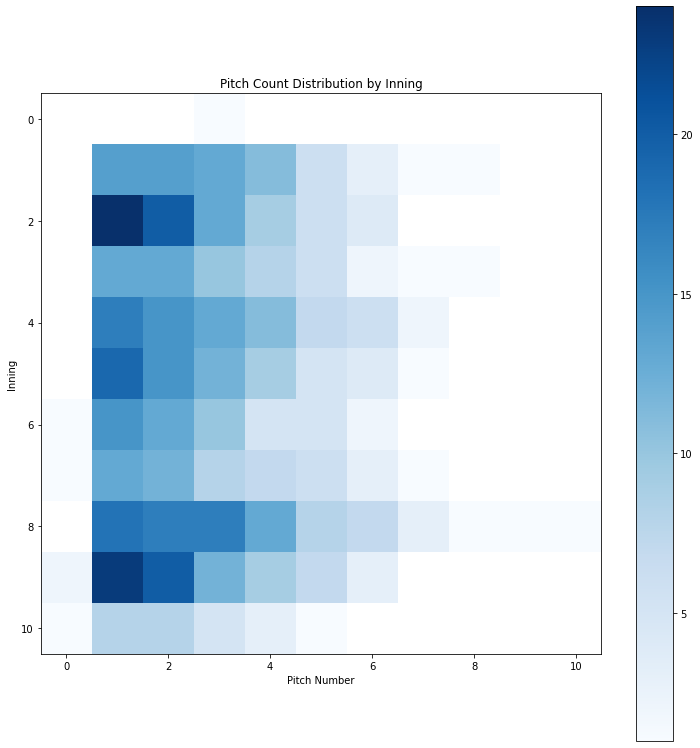

In [29]:
# Plot as heatmap
plt.imshow(pitch_counts_pivot, cmap="Blues")
plt.title("Pitch Count Distribution by Inning")
plt.xlabel("Pitch Number")
plt.ylabel("Inning")
plt.colorbar()
plt.show()

Pitch Type distribution by Pitcher Hand:

In [31]:
# Group by Pitch Type and Pitcher Hand, count the number of occurrences
pitch_counts = df.groupby(["PitchType", "PitcherHand"])["PitchId"].count().unstack()


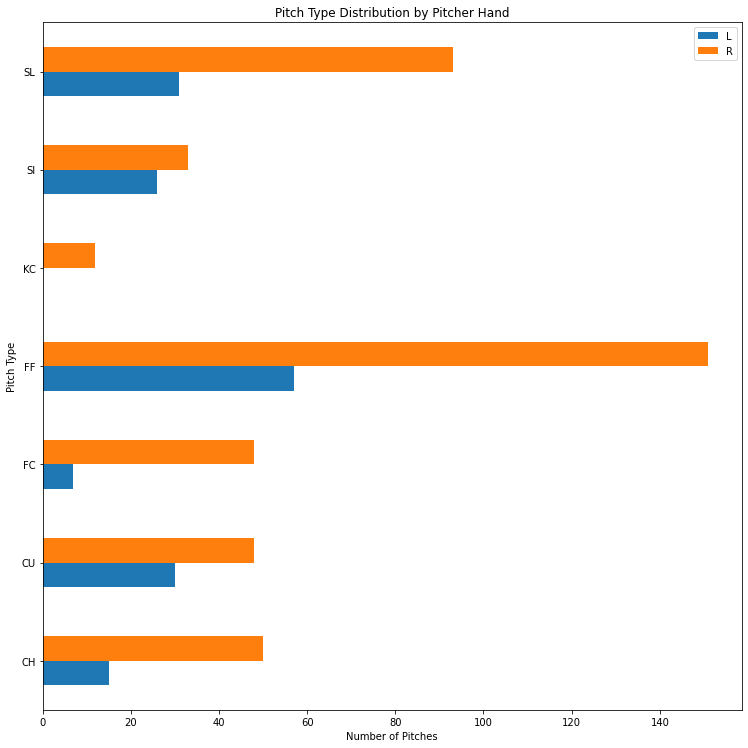

In [32]:
# Plot as horizontal bar chart
pitch_counts.plot(kind="barh")
plt.title("Pitch Type Distribution by Pitcher Hand")
plt.xlabel("Number of Pitches")
plt.ylabel("Pitch Type")
plt.legend(loc="best")
plt.show()